In [3]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
# sweep 50
#sweep = api.sweep("nicolas-debie-thesis/GAEC/la3svppn") 
# sweep 100
#sweep = api.sweep("nicolas-debie-thesis/GAEC/b5ov4eui")
# sweep 500
#sweep = api.sweep("nicolas-debie-thesis/GAEC/kattbknf")

runtime_runs = ['s8hucgpa','xxf8jnjq','mowno02k','hl2cgynw']
runs = [api.run(f"nicolas-debie-thesis/nesy/runs/{i}") for i in runtime_runs]

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.head()

,summary,config,name
0,"{'neural_facts': 10, 'test_acc_epoch': 0.47372...","{'epochs': 1, 'n_classes': 5, 'semantics': 'Su...",nesy_classes_runtime5
1,"{'_step': 10, 'neural_facts': 8, 'test_acc_ste...","{'epochs': 1, 'n_classes': 4, 'semantics': 'Su...",nesy_classes_runtime4
2,"{'_step': 8, '_runtime': 61.85262727737427, 'n...","{'epochs': 1, 'n_classes': 3, 'semantics': 'Su...",nesy_classes_runtime3
3,"{'epoch': 0, '_timestamp': 1708204020.8713028,...","{'epochs': 1, 'n_classes': 2, 'semantics': 'Su...",nesy_classes_runtime2


In [4]:
summary_flattened = runs_df.summary.apply(pd.Series)
config_flattened = runs_df.config.apply(pd.Series)

combined_df = pd.concat([summary_flattened, config_flattened], axis=1)

In [5]:
combined_df.head()
print(combined_df.columns)

Index(['neural_facts', 'test_acc_epoch', 'evaluation_time_epoch', '_runtime',
       'test_acc_step', 'non_neural_facts', 'train_loss_epoch',
       'reasoning_time_epoch', '_step', 'epoch', 'trainer/global_step',
       '_wandb', '_timestamp', 'epochs', 'n_classes', 'semantics',
       'batch_size', 'test_examples', 'train_examples'],
      dtype='object')


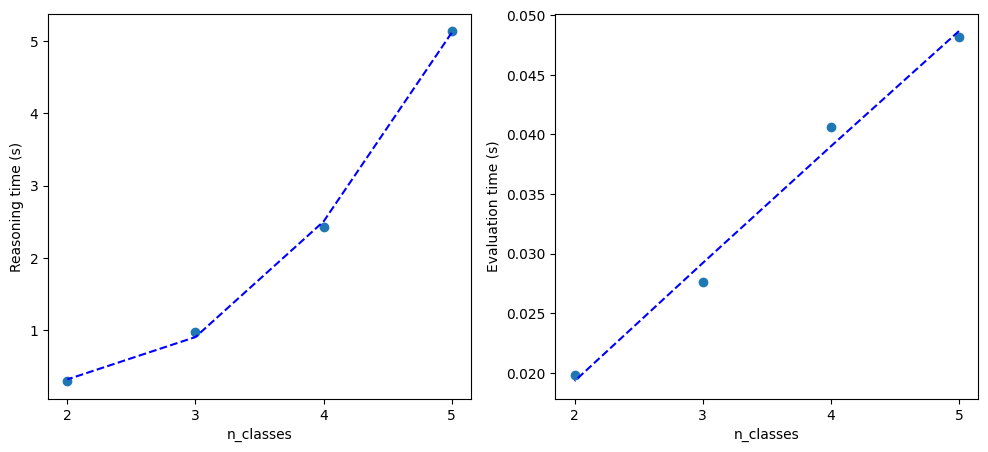

In [27]:
import numpy as np
# make a matplotlib plot with x axis n_classes and y_axis the reasoning_time_epoch and another plot with evaluation_time_epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(12,5))

### Reasoning time
ax[0].scatter(combined_df['n_classes'], combined_df['reasoning_time_epoch'])
ax[0].set_xlabel('n_classes')
ax[0].set_ylabel('Reasoning time (s)')
# set x-axis ticks to integers and enable grid
ax[0].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_classes'], combined_df['reasoning_time_epoch'], 2)
p = np.poly1d(z)
ax[0].plot(combined_df['n_classes'], p(combined_df['n_classes']), "b--")

### Evaluation time
ax[1].scatter(combined_df['n_classes'], combined_df['evaluation_time_epoch'])
ax[1].set_xlabel('n_classes')
ax[1].set_ylabel('Evaluation time (s)')
# set x-axis ticks to integers
ax[1].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Fit a polynomial regression line
z = np.polyfit(combined_df['n_classes'], combined_df['evaluation_time_epoch'], 2)
p = np.poly1d(z)
ax[1].plot(combined_df['n_classes'], p(combined_df['n_classes']), "b--")

plt.show()